![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/machineLearning3.png)

# K-Means Clustering

Kevin J. Walchko, Phd

9 Jan 2021

---

What this is trying to do, is find patterns in the data that may not be obvious. Here, the assumption is, similar things will logically be grouped together, we just need to find that grouping. k-means clustering is trying to break a set of data up into k clusters each centered around a mean value. The *k* defines the number of clusters to divide the data into. 

![](https://i.stack.imgur.com/HBHaa.png)

## References

- udemy machine learning class
- wikipedia: [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('../datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

So how do you *pick* the optimal *k* number of clusters? One way is to define a range of clusters, calculate the `inertia` and look for the bend in the curve.

> **inertia:** Sum of squared distances of samples to their closest cluster center.

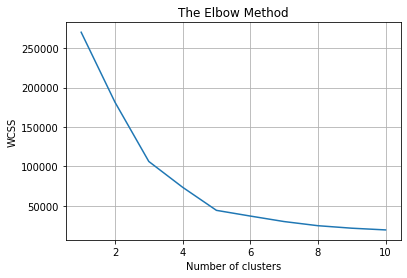

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

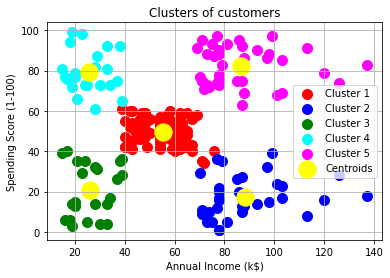

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)